<a href="https://colab.research.google.com/github/Ankush-kadu/Sentiment-Analysis-of-COVID-19-Tweets-Using-NLP/blob/main/Sentiment_Analysis_of_COVID_19_Tweets_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import random
import string      # for string operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# SetUp NLTK
!pip install --user -U nltk
import nltk
nltk.download('punkt')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!gdown 11LWo5nagSmC72hOJM9lm2l05sdQxt4rf

Downloading...
From: https://drive.google.com/uc?id=11LWo5nagSmC72hOJM9lm2l05sdQxt4rf
To: /content/corona_tweets.csv
100% 1.00M/1.00M [00:00<00:00, 101MB/s]


In [ ]:
dataframe = pd.read_csv("./corona_tweets.csv")
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


### Exploring the labels

Labels in the dataset:  ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64


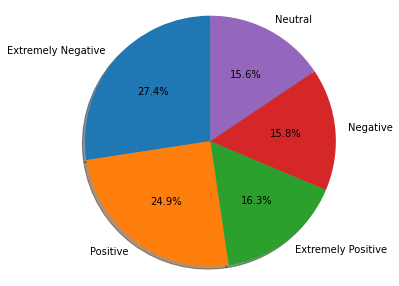

In [ ]:
# Check tweets distribution
def pie_chart(dataframe):
  # Converting pd object to list of string
  label_types  = dataframe.Sentiment.unique().astype(str)
  # Count tweets for each label
  label_counts = dataframe.Sentiment.value_counts()
  print('Labels in the dataset: ', label_types)
  print(label_counts)
  # labels for the two classes
  labels = label_types #'Positives', 'Negative'
  # Sizes for each slide
  sizes = [count for count in label_counts]
  # Declare a figure with a custom size
  fig = plt.figure(figsize=(5, 5))
  # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
  plt.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.axis('equal')
  # Display the chart
  plt.show()

pie_chart(dataframe)

In [ ]:
dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].shape

(1041,)

### Splitting the dataset into training and testing


In [ ]:
# Separating positive_tweets and negative_tweets
all_positive_tweets = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str)) # Making equal positive and negative tweet counts
all_negative_tweets = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]

# Splitting training and testing set. 80/20 split
positive_train, positive_test = train_test_split(all_positive_tweets, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size=0.2, random_state=42)

print("Size of training dataset: ",len(positive_train) + len(negative_train))
print("Size of testing dataset: ", len(positive_test)  + len(negative_test))

# print positive in green
print('\033[92m' + '\npositive in green: ')
print('\033[92m' + all_positive_tweets[random.randint(0,947)])
print('\033[91m' + '\nnegative in red: ')
# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,947)])

Size of training dataset:  1514
Size of testing dataset:  380

positive in green: 
@BriSmithy Was always about damage limitation,the self serving newly elected government dragging their heels lower than share prices.Lets hope common decency prevails to help others deal with the pandemic....Suddenly nobody remembers Brexit?..#inthistog

negative in red: 
My sister friend just sent her a screen shot of this and now shes freaking out and went to the store to buy food and stock up on everything! Tbh starting to worry now...all jokes aside #Coronavirus


In [ ]:
# Split on spaces
tweet = all_positive_tweets[12]
word = tweet.split() # space tokenizer
print('Using Split :',word)


Using Split : ['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus.', 'https://t.co/5mYfz3RAD0', '#retail', '#ecommerce', '#study', '#coronavirus', 'https://t.co/Dz3H6zrWUT']


**Note:**  split() does not consider punctuation as a separate token

In [ ]:
# Using 're' library to work with regular expression.

tokens = re.findall("[\w']+", tweet)
print('Using regexes :',tokens)

Using regexes : ['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', 'https', 't', 'co', '5mYfz3RAD0', 'retail', 'ecommerce', 'study', 'coronavirus', 'https', 't', 'co', 'Dz3H6zrWUT']


### Python already has modules for collecting, handling, and processing text data.


> **Using Natural Language Toolkit (NLTK) package.**



* NLTK contains a module called `tokenize`, which has the `word_tokenize()` method to split a sentence into tokens.

In [ ]:
from nltk.tokenize import word_tokenize

words = word_tokenize(tweet)
print('Using NLTK :',words)

Using NLTK : ['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'https', ':', '//t.co/5mYfz3RAD0', '#', 'retail', '#', 'ecommerce', '#', 'study', '#', 'coronavirus', 'https', ':', '//t.co/Dz3H6zrWUT']


**Note:** `word_tokenize()` is considering punctuation as a token. Hence we need to remove the punctuations from the initial list.



### How to tokenize into a Sentence?



*   A sentence usually ends with a full stop `.`, so we can use `.` as a separator to break the string:



In [ ]:
# Splits at '.'
splits = tweet.split('. ')
print('Using Splits :',splits)
# Using Regular Expressions (RegEx)
sentence_splits = re.compile('[.!?] ').split(tweet)
print('Using regexes :',sentence_splits)

Using Splits : ['Consumers have increased their online shopping due to coronavirus', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']
Using regexes : ['Consumers have increased their online shopping due to coronavirus', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


**Note:** a drawback of using Python’s `split()` method is that we can use only one separator at a time.



<details>
<summary>
    <font size="5" color=""><b>Python split() VS nltk sent_tokenize</b></font>
</summary>
<p>

**Cosider an example:**

```
eg_sentence = "Dr. A. P. J. Abdul Kalam was the Former President of India and a world-renowned Space Scientist."

Using split :
['Dr', 'A', 'P', 'J', 'Abdul Kalam was the Former President of India and a world-renowned Space Scientist']

Using NLTK sent_tokenize:
['Dr. A. P. J. Abdul Kalam was the Former President of India and a world-renowned Space Scientist.']
```

<ol>
<li>  
Here, the python split() function made the mistake of tokenizing the name.
</li>

<li>  
To properly tokenize such function we require a sequence of RegEx functions.
</li>

<li>  
NLTK has pre-defined functions to handle such conditions.
</li>
</ol>
</p>
</details>





In [ ]:
# Using NLTK
from nltk.tokenize import sent_tokenize
sentence_splits = sent_tokenize(tweet)
print('Using NLTK :',sentence_splits)

Using NLTK : ['Consumers have increased their online shopping due to coronavirus.', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer

In [ ]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[12]
tweet

'Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT'

In [ ]:
# Removing hyperlinks and hashtags

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT

Consumers have increased their online shopping due to coronavirus.  retail ecommerce study coronavirus 


In [ ]:
# Tokenizing

print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Consumers have increased their online shopping due to coronavirus.  retail ecommerce study coronavirus 


Tokenized string:
['consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'retail', 'ecommerce', 'study', 'coronavirus']


In [ ]:
# Import the english stop words list from NLTK
nltk.download("stopwords")
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'retail', 'ecommerce', 'study', 'coronavirus']

removed stop words and punctuation:
['consumers', 'increased', 'online', 'shopping', 'due', 'coronavirus', 'retail', 'ecommerce', 'study', 'coronavirus']


In [ ]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['consumers', 'increased', 'online', 'shopping', 'due', 'coronavirus', 'retail', 'ecommerce', 'study', 'coronavirus']

stemmed words:
['consum', 'increas', 'onlin', 'shop', 'due', 'coronaviru', 'retail', 'ecommerc', 'studi', 'coronaviru']


In [ ]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [ ]:
# choose the same tweet
tweet = all_positive_tweets[12]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT

preprocessed tweet:
['consum', 'increas', 'onlin', 'shop', 'due', 'coronaviru', 'retail', 'ecommerc', 'studi', 'coronaviru']


In [ ]:
# select some words to appear in the report.
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['void', 1, 0],
 ['commun', 15, 10],
 ['spirit', 1, 2],
 ['stop', 14, 32],
 ['merri', 0, 0],
 ['nice', 6, 6],
 ['good', 49, 28],
 ['bad', 1, 8],
 ['sad', 0, 5],
 ['mad', 2, 8],
 ['best', 7, 3],
 ['pretti', 6, 3],
 [':)', 1, 1],
 [':(', 3, 0],
 ['song', 2, 0],
 ['idea', 6, 8],
 ['power', 5, 0],
 ['play', 8, 1]]

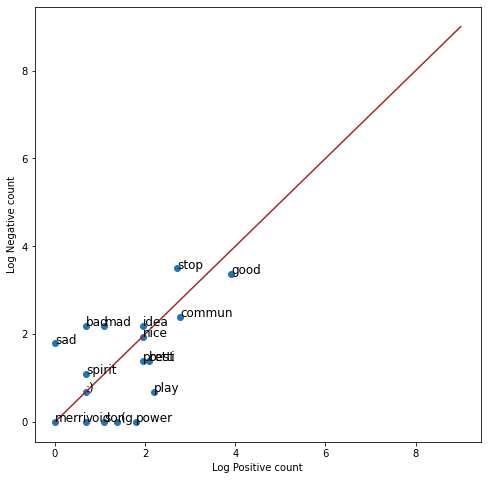

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'brown') # Plot the red line that divides the 2 areas.
plt.show()

### Extracting features function.

In [ ]:
def extract_features(tweet, freqs):
    '''
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in word_l:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)

    assert(x.shape == (1, 3))
    return x

### Example 1: feature extraction for a tweet

In [ ]:
train_x = training_tweets
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 2.284e+03 2.482e+03]]


### Example 2: feature extraction for a random string

In [ ]:
tmp2 = extract_features('This batch is the best batch', freqs)
print(tmp2)

[[ 1. 11.  3.]]


### Preparing training data

In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y,order='C')



## 1.6 Using the most basic model to classify




<details>
<summary>
    <font size="3" color=""><b>Answer</b></font>
</summary>
<p>
<ul>
    <li>Logistic Regression.</li>
</ul>
</p>

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.678996036988111


### Check performance on test set

In [ ]:
# Testing
testing_tweets = positive_test + negative_test

test_X = np.zeros((len(testing_tweets), 3))
for i in range(len(testing_tweets)):
    test_X[i, :]= extract_features(testing_tweets[i], freqs)

# training labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_Y = np.ravel(test_y,order='C')

print("Testing Accuracy: ",clf.score(test_X, test_Y))

Testing Accuracy:  0.55


### Predict whether a tweet is positive or negative.

**Note:** classify 1, for a positive sentiment, and 0, for a negative sentiment.

In [ ]:
def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)
    return y_pred

# test your function
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over',
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding',
                  '\033[92m'+'Government efforts are great.',
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus',
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 1.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 1.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000
